In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle

%matplotlib inline

sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set1")

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'

# Dataset 

## Información general
RAVDESS | Ryerson Audio-Visual Database of Emotional Speech and Song 
--- | --- 
Idioma | North American English
Muestras | 1440
Emociones | anger calm disgust fear happiness sadness surprise neutral
Nº de actores | 24 (12H 12M)
Naturaleza | Simulada
URLs | [Documentación](https://smartlaboratory.org/ravdess/) - [Paper construcción RAVDESS](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0196391)

Emotional intensity (01 = normal, 02 = strong)

**Archivos**

carcterística | valor
--- | --- 
codec | PCM S16 LE
channels | Mono
sample rate  | 16000 Hz
bit rate | 16 kbps



## Selección de muestras
Emociones de estudio
- anger 
- disgust 
- fear 
- happiness 
- sadness

Cargando el objeto del dataset

In [5]:
dataset = "ravdess-01234"
dataset_path = "data/" + dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
number_samples = len(ds.targets)

Loading data from ravdess-01234 data set...


**Número de muestras**

In [6]:
print("Number of samples: " + str(number_samples))

Number of samples: 480


**Distribución de duración** de los audios

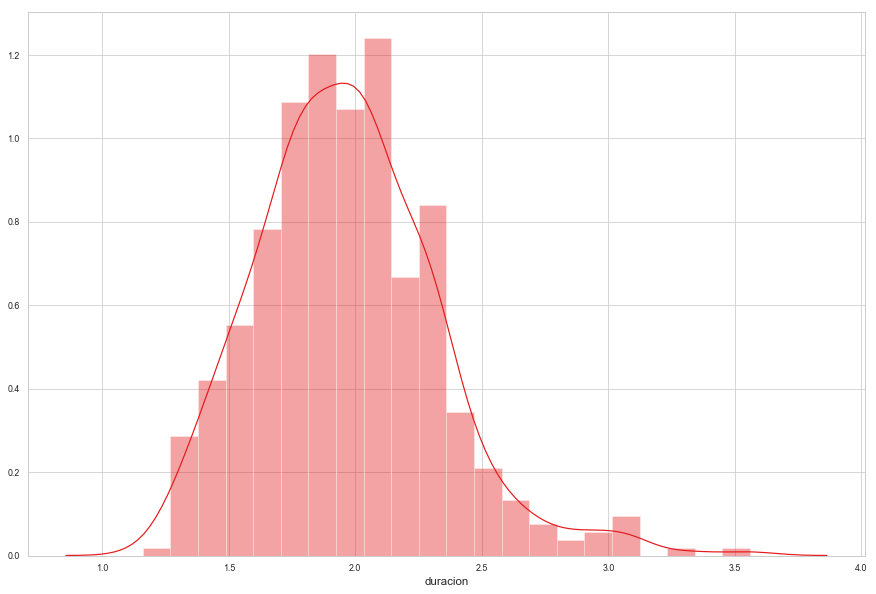

In [7]:
duracion = []
for i in range(0, number_samples):
    duracion.append((ds.data[i][0].size) / 16000)

df_duracion = pd.Series(data=duracion, name="duracion")
sns.distplot(df_duracion)

Numero de **muestras por emoción**:

In [ ]:
df_emotions = pd.Series(data=ds.targets, name="emotion", dtype="category")
df_emotions = df_emotions.map(lambda i: ds.dictionary[i])
df_emotions.value_counts()

**Distribución de duración según la emoción**

In [ ]:
df_aux = pd.concat([df_emotions, df_duracion], axis=1)
sns.violinplot(x=df_aux["emotion"], y=df_aux["duracion"])

## Selección de la longitud de ventana de muestreo

In [ ]:

df_compare_frame_size = pd.read_csv('data/compare_frame_size_csv/' + dataset +
                                    '.csv')
df_compare_frame_size.head()

In [ ]:
for column in df_compare_frame_size.drop(["frame_size","emotion"],axis=1):
    ax = sns.lineplot(x="frame_size", y=column, hue="emotion", data=df_compare_frame_size)
    plt.show()
    

# Características

Cargando el array tridimensional de características

In [ ]:
label_features = [
    'zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread',
    'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1',
    'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1',
    'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7',
    'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'chroma_std', 'harmonic_ratio', 'pitch'
]


print("Loading features from file...\n")
features = pickle.load(open(dataset_path + dataset + '_features.p', 'rb'))

Creando un **dataframe con MultiIndex** a partir del objeto tridimensional

In [ ]:
df = pd.DataFrame()
audio_index = []
row_index = []
i = 0
for single_audio in features:
    audio_index = np.full(shape=len(single_audio), fill_value=i)
    row_index = np.arange(len(single_audio))
    index_df = pd.DataFrame({"audio_number": audio_index, "row": row_index})

    single_audio_df = pd.DataFrame(single_audio, columns=label_features)

    aux_df = pd.concat([index_df, single_audio_df], axis=1)

    df = pd.concat([df, aux_df], axis=0, ignore_index=True)
    i += 1

df = df.set_index(["audio_number", "row"])
df.head()

Función para la representación de los boxplot de cada caraterística

In [ ]:
def display_boxplot(feature, df, df_emotions):
    df_features_mean = pd.DataFrame(columns=label_features)
    for i in range(0, df_emotions.size):
        df_features_mean = df_features_mean.append(df.loc[i].mean(),
                                                   ignore_index=True)
    df_aux = pd.concat([df_emotions, df_features_mean], axis=1)

    sns.boxplot(x=df_aux["emotion"], y=df_aux[feature])
    plt.xlabel("emotion", fontsize=20)
    plt.ylabel(feature, fontsize=20)
    plt.tick_params(labelsize=17)
    plt.show()

## Zero Crossing Rate (zcr)

ZCR calcula el **promedio ponderado de la cantidad de veces que la señal de voz cambia de signo** dentro de una ventana de tiempo particular.


In [ ]:
display_boxplot("zcr", df, df_emotions)

## Energy (energy)

Log-energy indica la amplitud cuadrada total en un segmento del habla. 
Esta característica es simplemente la **cantidad de potencia o volumen normalizado en la señal.**

In [ ]:
display_boxplot("energy", df, df_emotions)

## Entropy of Energy (energy_entropy)

La entropía de las energías normalizadas de los sub-frames. Puede interpretarse como una medida de cambios abruptos.

In [ ]:
display_boxplot("energy_entropy", df, df_emotions)

## Pitch (pitch)

El tono puede cuantificarse como una frecuencia, pero el tono no es una propiedad física puramente objetiva; es un atributo psicoacústico subjetivo del sonido.

In [ ]:
display_boxplot("pitch", df, df_emotions)

## Harmonic ratio (harmonic_ratio)

El ratio entre la energía en la porción armónica del frame respecto a la total.

In [ ]:
display_boxplot("harmonic_ratio", df, df_emotions)

# Spectral

## Spectral Centroid (spectral_centroid)

El centro de gravedad del espectro.

In [ ]:
display_boxplot("spectral_centroid", df, df_emotions)

## Spectral Spread (spectral_spread)

The second central moment of the spectrum.

In [ ]:
display_boxplot("spectral_spread", df, df_emotions)

## Spectral Entropy (spectral_entropy)

Entropía de las energías espectrales normalizadas para un conjunto de subframes.

In [ ]:
display_boxplot("spectral_entropy", df, df_emotions)

## Spectral Flux (spectral_flux)

La diferencia al cuadrado entre las magnitudes normalizadas de los espectros de los dos frames sucesivos.

In [ ]:
display_boxplot("spectral_flux", df, df_emotions)

## Spectral Rolloff (spectral_rolloff)

La frecuencia por debajo de la cual se concentra el 90% de la distribución de la magnitud del espectro.

In [ ]:
display_boxplot("spectral_rolloff", df, df_emotions)

## MFCCs  (mfcc_< X >)

Los Mel Frequency Cepstral Coeﬃcients (Coeﬁcientes Cepstrales en las Frecuencias de Mel) o MFCCs **son coeﬁcientes para la representación del habla basados en la percepción auditiva humana**.

In [ ]:
for mfcc in label_features[8:21]:
    display_boxplot(mfcc, df, df_emotions)

## Chroma Vector (chroma_< X >) - Chroma Deviation (chroma_std)

Una representación de 12 elementos de la energía espectral en la que los intervalos **representan las 12 clases de tonos de la música de tipo occidental** (espaciado de semitono).

La desviación estándar de los 12 coeficientes 

In [ ]:
for chroma in label_features[21:34]:
    display_boxplot(chroma, df, df_emotions)